In [1]:
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/justinbailey/Documents/VSCode/Python/Datasets/Apr-01-2025_May-21-2025_2796785830507164.csv')

In [2]:
df= df.drop(columns=['Page ID', 'Description', 'Caption type', 'Permalink', 'IMPRESSION:UNIQUE_USERS', 'Is crosspost','Is share', 'Negative feedback from users: Hide all' ])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Post ID                                               28 non-null     int64  
 1   Page name                                             28 non-null     object 
 2   Title                                                 28 non-null     object 
 3   Duration (sec)                                        28 non-null     int64  
 4   Publish time                                          28 non-null     object 
 5   Post type                                             28 non-null     object 
 6   Languages                                             0 non-null      float64
 7   Custom labels                                         0 non-null      float64
 8   Funded content status                                 0 non-nu

In [4]:
columns_to_drop = df.columns[[0, 1, 6, 7, 8, 9, 10]]


In [5]:
df = df.drop(columns=columns_to_drop)

In [6]:
df['Publish time'] = pd.to_datetime(df['Publish time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Title                                                 28 non-null     object        
 1   Duration (sec)                                        28 non-null     int64         
 2   Publish time                                          28 non-null     datetime64[ns]
 3   Post type                                             28 non-null     object        
 4   Views                                                 27 non-null     float64       
 5   Reach                                                 27 non-null     float64       
 6   Reactions, Comments and Shares                        27 non-null     float64       
 7   Reactions                                             27 non-null     float64     

In [8]:
df['Day of The Week'] = df['Publish time'].dt.strftime('%a')

In [9]:
df = df.drop(index=0)

In [10]:
df_post_type_pivot = df.pivot_table(values=['Reactions, Comments and Shares'], columns=['Post type'], aggfunc={'Reactions, Comments and Shares': 'median', 'Post type': 'size'})
df_post_type_pivot

Post type,Links,Photos,Text
Post type,2.0,24.0,1.0
"Reactions, Comments and Shares",31.5,54.0,63.0


(array([0, 1]),
 [Text(0, 0, 'Post type'), Text(1, 0, 'Reactions, Comments and Shares')])

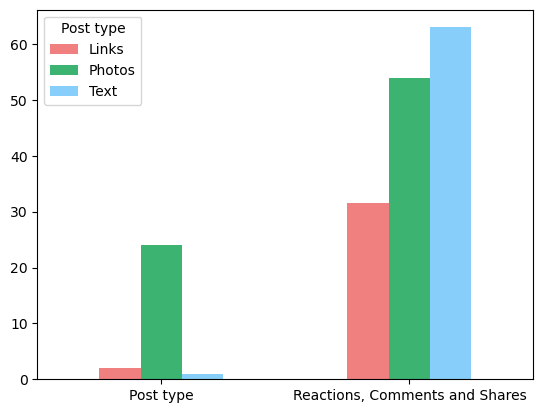

In [11]:
colors = ['lightcoral', 'mediumseagreen', 'lightskyblue']

df_post_type_pivot.plot(kind='bar', color=colors)
plt.xticks(rotation= 0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 1 to 27
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Title                                                 27 non-null     object        
 1   Duration (sec)                                        27 non-null     int64         
 2   Publish time                                          27 non-null     datetime64[ns]
 3   Post type                                             27 non-null     object        
 4   Views                                                 27 non-null     float64       
 5   Reach                                                 27 non-null     float64       
 6   Reactions, Comments and Shares                        27 non-null     float64       
 7   Reactions                                             27 non-null     float64     

In [14]:
df_engagement_by_day_of_week = df.pivot_table(values='Reactions, Comments and Shares', index='Day of The Week', aggfunc='sum')

<Axes: xlabel='Day of The Week'>

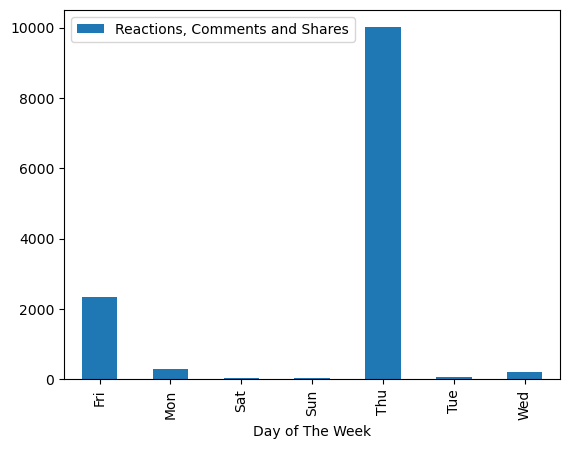

In [16]:
df_engagement_by_day_of_week.plot(kind='bar')